<a href="https://colab.research.google.com/github/dhguslee/leedo/blob/main/Machine%20Learning%20Code/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
---

### I. Library and Data  preparation

In [ ]:
from sklearn.linear_model import LinearRegression
  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["target"] = iris.target

print(df.head(), "\n (행, 열) :", df.shape)

x = df.iloc[ :, 2]      # df.iloc[] : row or col index로 특정 row or col 추출.
y = df.iloc[: , 3]

print("x :", x.head(), "\n", "y :", y.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns] 
 (행, 열) : (150, 5)
x : 0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64 
 y : 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal width (cm), dtype: float64


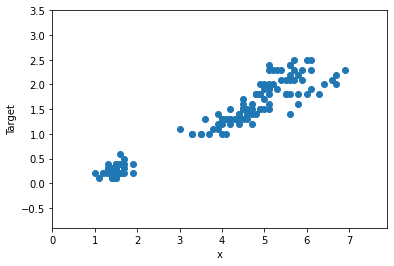

In [ ]:
plt.scatter(x, y)
plt.xlim([min(x) - 1, max(x) + 1])
plt.ylim([min(y) - 1, max(y) + 1])
plt.xlabel("x")
plt.ylabel("Target")
plt.show()


### II. Train dataset and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105,), (45,), (105,), (45,))

### III. Model train

In [ ]:
x_train_2D = x_train.values.reshape(-1,1)   # (150, 1)
print("Original_x : ", type(x), x.shape, "\n",
      "2D_x :", type(x_2D), x_2D.shape)


LR = LinearRegression()

LR.fit(x_train_2D, y_train)     # x 데이터가 2차원 array형태로 입력해야한다.

Original_x :  <class 'pandas.core.series.Series'> (150,) 
 2D_x : <class 'numpy.ndarray'> (105, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### IV. Prediction

In [ ]:
x_test_2D = x_test.values.reshape(-1, 1)

y_pred = LR.predict(x_test_2D)
y_pred

array([0.11965142, 0.87907312, 1.46973443, 0.16184152, 2.31353631,
       1.59630471, 1.76506509, 0.41498208, 0.2884118 , 2.01820565,
       1.38535424, 0.33060189, 2.10258584, 1.51192453, 1.51192453,
       0.16184152, 1.30097406, 1.51192453, 0.24622171, 0.11965142,
       1.46973443, 1.51192453, 1.722875  , 0.16184152, 2.14477594,
       1.34316415, 0.20403161, 0.24622171, 1.59630471, 1.722875  ,
       1.55411462, 2.18696603, 1.25878396, 1.97601556, 1.76506509,
       0.24622171, 1.30097406, 0.20403161, 1.55411462, 2.06039575,
       1.93382547, 0.20403161, 1.722875  , 1.97601556, 1.55411462])

### V. MSE

In [ ]:
mse = np.mean(np.square(np.sum(y_pred - y_test)))
np.round(mse, 4)

0.0047

### VI. 기울기와 절편

In [ ]:
print("기울기 :", np.round(LR.coef_, 4), "절편 : ", np.round(LR.intercept_, 4))

기울기 : [0.4219] 절편 :  -0.3866


### VII. Visualization

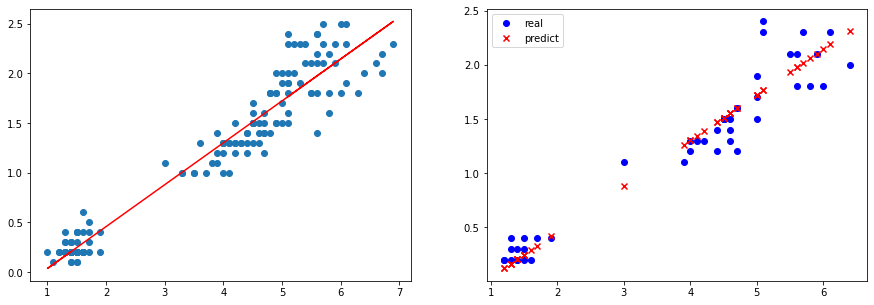

In [ ]:
LR_y = LR.intercept_ + LR.coef_*x

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.scatter(x, y)
plt.plot(x, LR_y, color = "red")

plt.subplot(122)
plt.scatter(x_test, y_test, color= "blue", marker = "o",  label = "real")
plt.scatter(x_test, y_pred, color= "red", marker = "x", label = "predict")
plt.legend()
plt.show()

# Multi Linear Regression
---

### I. Library and Data  preparation

In [ ]:
from sklearn.linear_model import LinearRegression
  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df["target"] = boston.target

print(df.head(), "\n (행, 열) :", df.shape)

x = df.loc[ : , df.columns != "target"]   # target을 제외한 모든 행을 x로 선택
y = df["target"]
print("x :", x.head(), "\n", "y :", y.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns] 
 (행, 열) : (506, 14)
x :       CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.3

### II. Train dataset and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### III. Model Train

In [ ]:
MLR = LinearRegression()

print(x_train.shape, type(x_train))

MLR.fit(x_train, y_train)

(354, 13) <class 'pandas.core.frame.DataFrame'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### IV. Prediction

In [ ]:
y_pred = MLR.predict(x_test)
y_pred

array([23.60107664, 22.04294254, 32.92377058, 31.91022563,  2.99227543,
        2.30931786, 27.24307664, 22.22378555, 15.63121244, 22.01776894,
       30.9081731 , 26.25867172, 20.98500214, 18.08561794, 17.48148297,
       25.66225133, 24.17903047, 13.46872099,  8.11358881, 18.98082595,
       21.86465498, 20.25622265, 36.91155565, 20.90909029, 20.24640709,
       15.37190713, 37.80616835, 34.6731445 , 30.31794568, 23.04231982,
       18.92214187, 20.75992822, 31.34205264, 29.76580943, 13.8418402 ,
       16.3196928 , 13.75124615, 24.26067475, 25.9231117 , 22.99977788,
       28.75660688, 12.3235743 , 31.16617755,  6.53718251, 23.88496902,
       20.92276495, 33.16629819, 19.57388844, 36.464448  ,  0.10366224,
       32.10365338, 31.71501622,  6.71303034, 34.63579086, 20.89498886,
       19.84248247, 19.63295005, 18.5086544 , 15.86301943, 22.63989081,
       19.71274635, 16.11818655, 18.44773944, 32.47889806, 35.32691618,
       24.55178159, 40.85972609, 33.06546131, 14.79984596, 27.22

### V. MSE

In [ ]:
mse = np.mean(np.square(np.sum(y_pred - y_test)))
np.round(mse, 4)

1274.3478

### VI. 기울기와 절편

In [ ]:
print("기울기 : ", np.round(MLR.coef_, 4), "절편 : ", np.round(MLR.intercept_, 4))

기울기 :  [-9.33000e-02  3.11000e-02 -1.82000e-02  3.19560e+00 -1.51043e+01
  3.50100e+00  1.90000e-02 -1.26550e+00  3.22200e-01 -1.09000e-02
 -1.08960e+00  1.25000e-02 -6.07600e-01] 절편 :  37.1625


### VII. Visualization

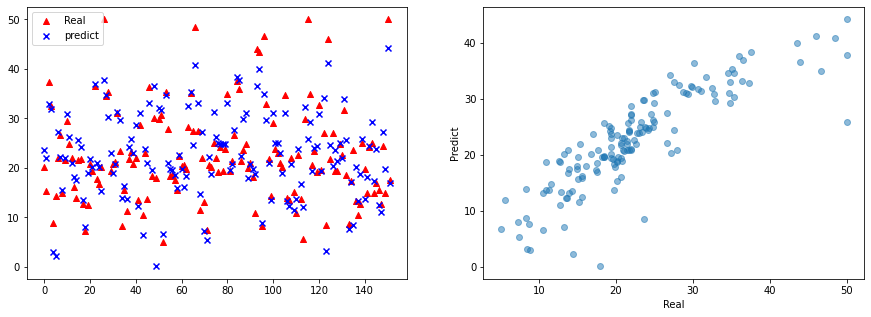

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(121)
rang = list(range(0,len(y_pred)))
plt.scatter(rang, y_test, color = "red", marker = "^", label = "Real")
plt.scatter(rang, y_pred, color = "blue", marker = "x", label = "predict")
plt.legend()


# 정확할 수록 직선모양에 가깝다
plt.subplot(122)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Real")
plt.ylabel("Predict")

plt.show()
